<a href="https://colab.research.google.com/github/yllescasra/python_fundamentals/blob/main/analisis_de_sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sentiment-analysis-spanish

In [ ]:
from sentiment_analysis_spanish import sentiment_analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Leer el archivo .xls y almacenar los datos en un DataFrame
ruta_del_archivo = "/content/Comentarios Chatbot.xlsx"
df = pd.read_excel(ruta_del_archivo)
df.dropna(subset=["Opinion"], inplace=True)  # Eliminar filas con valores faltantes en "Opinion"

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print(df.head())

In [ ]:
# Crear una instancia de SentimentAnalysisSpanish
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

# Función para aplicar el análisis de sentimiento
def analizar_sentimiento(texto):
    if isinstance(texto, str):
        return sentiment.sentiment(texto)
    else:
        return np.nan

In [ ]:
# Aplicar el análisis de sentimiento a la columna "Opinion"
df["Sentimiento"] = df["Opinion"].apply(analizar_sentimiento)

# Agregar una columna "Resultado" basada en la lógica de sentimiento
def determinar_resultado(sentimiento):
    if sentimiento > 0.6:
        return "positivo"
    elif sentimiento < 0.4:
        return "negativo"
    else:
        return "neutro"

df["Resultado"] = df["Sentimiento"].apply(determinar_resultado)

# Mostrar las columnas "Opinion", "Sentimiento" y "Resultado"
print(df[["Opinion", "Sentimiento", "Resultado"]])


  Cod_oferta                        Opinion
1      85198     Bien desarrollado el curso
2      85198                     Buen curso
3      85198  Creo quel curso esta correcto
4      85198        Esta bueno y recreativo
5      85198   Excelente curso muy práctico


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


                                        Opinion  Sentimiento Resultado
1                    Bien desarrollado el curso     0.646898  positivo
2                                    Buen curso     0.782429  positivo
3                 Creo quel curso esta correcto     0.182745  negativo
4                       Esta bueno y recreativo     0.411828    neutro
5                  Excelente curso muy práctico     0.999935  positivo
...                                         ...          ...       ...
77779                                        Ok     0.497892    neutro
77780                                        Ok     0.497892    neutro
77781                                         .     0.497892    neutro
77782  Curso com excelente qualidade de ensino.     0.957846  positivo
77783                           Sem comentários     0.497892    neutro

[75238 rows x 3 columns]


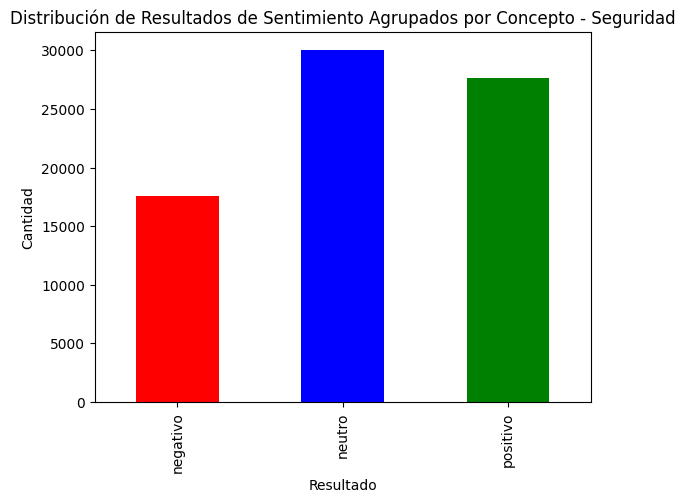

In [ ]:
# Crear un gráfico de barras agrupado por resultado
resultado_counts = df.groupby(['Resultado'])['Resultado'].count()
resultado_counts.plot(kind="bar", color=['red', 'blue', 'green'])

# Configurar etiquetas y título
plt.xlabel("Resultado")
plt.ylabel("Cantidad")
plt.title("Distribución de Resultados de Sentimiento Agrupados por Concepto - Seguridad")

# Mostrar la gráfica
plt.show()